In [57]:
# the fun bit, looking at the data, making visualizations, finding longest/shortest words by travel distance
import pandas as pd
pd.options.mode.chained_assignment = None

df = pd.read_csv('word_distances.csv', keep_default_na = False)
layouts = ['qwerty', 'dvorak', 'colemak', 'workman']
measures = ['dist', 'dpl', 'dpj']
print(df.head())

    words  length  qwerty  dvorak  colemak  workman  qwerty_home  dvorak_home  \
0      AA       2    0.00    0.00     0.00     0.00       100.00       100.00   
1     AAA       3    0.00    0.00     0.00     0.00       100.00       100.00   
2     AAH       3   95.25  114.30    95.25    38.10        66.67       100.00   
3   AAHED       5  179.67  247.65   190.50   253.93        60.00        80.00   
4  AAHING       6  212.92  275.51   237.41   266.70        33.33        66.67   

   colemak_home  workman_home  
0        100.00        100.00  
1        100.00        100.00  
2         66.67        100.00  
3         60.00         80.00  
4         66.67         83.33  


In [58]:
df_a = df.melt(id_vars = ['words', 'length'], value_vars = layouts, var_name = 'layouts', value_name = 'dist')
df_b = df.melt(id_vars = ['words', 'length'], value_vars = layouts_home, var_name = 'layouts', value_name = 'home')
df_b['layouts'] = df_b['layouts'].str.replace('_home', '')
print(df_a.head())
print(df_b.head())

    words  length layouts    dist
0      AA       2  qwerty    0.00
1     AAA       3  qwerty    0.00
2     AAH       3  qwerty   95.25
3   AAHED       5  qwerty  179.67
4  AAHING       6  qwerty  212.92
    words  length layouts    home
0      AA       2  qwerty  100.00
1     AAA       3  qwerty  100.00
2     AAH       3  qwerty   66.67
3   AAHED       5  qwerty   60.00
4  AAHING       6  qwerty   33.33


In [59]:
df_merged = pd.merge(df_a, df_b, on = ['words', 'length', 'layouts'])
print(df_merged.head())

    words  length layouts    dist    home
0      AA       2  qwerty    0.00  100.00
1     AAA       3  qwerty    0.00  100.00
2     AAH       3  qwerty   95.25   66.67
3   AAHED       5  qwerty  179.67   60.00
4  AAHING       6  qwerty  212.92   33.33


In [60]:
#distance per letter for each word
df_merged['dpl'] = round(df_merged['dist'] / df_merged['length'], 3)

#distance per jump for each word
df_merged['dpj'] = round(df_merged['dist'] / (df_merged['length']-1), 3)

print(df_merged.head())

    words  length layouts    dist    home     dpl     dpj
0      AA       2  qwerty    0.00  100.00   0.000   0.000
1     AAA       3  qwerty    0.00  100.00   0.000   0.000
2     AAH       3  qwerty   95.25   66.67  31.750  47.625
3   AAHED       5  qwerty  179.67   60.00  35.934  44.918
4  AAHING       6  qwerty  212.92   33.33  35.487  42.584


In [63]:
df_merged = df_merged[df_merged['dist'] > 0]
print(df_merged.head())

    words  length layouts    dist    home     dpl     dpj
2     AAH       3  qwerty   95.25   66.67  31.750  47.625
3   AAHED       5  qwerty  179.67   60.00  35.934  44.918
4  AAHING       6  qwerty  212.92   33.33  35.487  42.584
5    AAHS       4  qwerty  171.45   75.00  42.862  57.150
6     AAL       3  qwerty  152.40  100.00  50.800  76.200


In [64]:
#get top 20 for particular measure and save to csv
def analysis(layout):
    df_output = pd.DataFrame()
    df_subset = df_merged[df_merged['layouts']==layout]
    for meas in measures:
        df_subset.sort_values(by=meas, inplace = True, ascending = False)
        df_add = df_subset.head(20)
        df_add['meas'] = meas
        df_output = df_output.append(df_add, ignore_index = True)
    filename = 'longest_' + layout + '.csv'
    df_output.to_csv(filename, index = False)

In [65]:
def shortest(layout):
    df_output = pd.DataFrame()
    df_subset = df_merged[df_merged['layouts'] == layout]
    for i in range(3, 11):
        df_len = df_subset[df_subset['length'] == i]
        df_len.sort_values(by = 'dist', inplace = True, ascending = True)
        df_add = df_len.head(15)
        df_output = df_output.append(df_add, ignore_index = True)
    filename = 'shortest_' + layout + '.csv'
    df_output.to_csv(filename, index = False)

In [66]:
for ly in layouts:
    analysis(ly)
    shortest(ly)

In [ ]:
'''Below this point is still in progress'''




In [37]:
df_shortest = pd.DataFrame()
for i in range(3, 11):
    df_n = shortest(i)
    df_shortest = df_shortest.append(df_n, ignore_index = True)
df_shortest.to_csv('shortest.csv', index = False)

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df_plottable = df.melt(id_vars = ['length', 'words'], value_vars = layouts, var_name = 'layouts', value_name = 'dist')
print(df_plottable.head())

sampledf = df_plottable[df_plottable['words'] == 'LAVALAVAS']
print(sampledf)

   length   words layouts    dist
0       2      AA  qwerty    0.00
1       3     AAA  qwerty    0.00
2       3     AAH  qwerty   95.25
3       5   AAHED  qwerty  179.67
4       6  AAHING  qwerty  212.92
         length      words  layouts     dist
169244        9  LAVALAVAS   qwerty   753.61
539321        9  LAVALAVAS   dvorak  1326.92
909398        9  LAVALAVAS  colemak   649.00
1279475       9  LAVALAVAS  workman   746.17


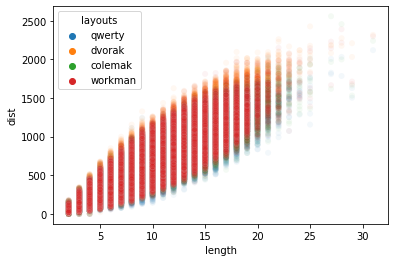

In [26]:
sns.scatterplot(x='length', y='dist', data = df_plottable, hue = 'layouts', alpha = 0.05)

#plt.scatter(df['length'], df['qwerty'], color = 'red', alpha = 0.05, label = 'qwerty')
#plt.scatter(df['length'], df['dvorak'], color = 'blue', alpha = 0.05, label = 'dvorak')
#plt.scatter(df['length'], df['colemak'], color = 'green', alpha = 0.05, label = 'colemak')
#plt.scatter(df['length'], df['workman'], color = 'gray', alpha = 0.05, label = 'workman')


#plt.xlabel('Word Length (letters)')
#plt.ylabel('Travel Distance (mm)')

#plt.legend(loc = 'lower right')
#plt.title('Keyboard Travel Distance by Word Length')
#plt.savefig('scatter.jpg')
plt.show()

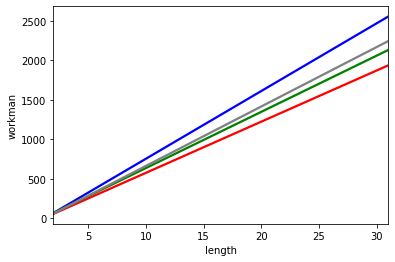

In [37]:
sns.regplot(x='length', y='dvorak', data=df, color='blue', scatter=None)
sns.regplot(x='length', y='qwerty', data=df, color='red', scatter=None)
sns.regplot(x='length', y='colemak', data=df, color='green', scatter=None)
sns.regplot(x='length', y='workman', data=df, color='gray', scatter=None)

plt.show()

In [15]:
df.describe()

,length,qwerty,dvorak,colemak,workman,qwerty_home,dvorak_home,colemak_home,workman_home,qw_dpl,dv_dpl,co_dpl,wo_dpl,qw_dpj,dv_dpj,co_dpj,wo_dpj
count,370077.000000,370077.000000,370077.000000,370077.000000,370077.000000,370077.000000,370077.000000,370077.000000,370077.000000,370077.000000,370077.000000,370077.000000,370077.000000,370077.000000,370077.000000,370077.000000,370077.00000
mean,9.443092,540.445125,707.043195,597.513667,622.062303,27.172375,53.505112,62.721841,58.335058,56.456328,73.704833,62.385295,64.814980,63.997423,83.499307,70.696588,73.42246
std,2.915688,219.999812,281.863394,239.995273,254.363753,14.752540,15.107570,15.085789,14.869272,12.847602,15.212042,13.599593,14.550524,14.581592,16.984693,15.275018,16.23313
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,7.000000,380.520000,503.620000,421.330000,436.150000,16.670000,42.860000,53.850000,50.000000,47.864000,63.850000,53.321000,55.190000,54.266000,72.396000,60.420000,62.58800
50%,9.000000,517.090000,679.590000,573.590000,595.960000,25.000000,54.550000,63.640000,58.330000,56.344000,74.126000,62.315000,64.611000,63.366000,83.314000,70.142000,72.73200
75%,11.000000,676.540000,882.710000,749.380000,782.550000,36.360000,63.640000,72.730000,66.670000,64.782000,83.952000,71.402000,74.272000,72.863000,94.298000,80.374000,83.58000
max,31.000000,2119.490000,2427.090000,2558.520000,2390.000000,100.000000,100.000000,100.000000,100.000000,139.114000,147.436000,127.073000,132.145000,171.450000,181.970000,171.450000,177.24000
